# Classifier evaluation metrics 

## Read the data

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
Data=pd.read_csv ('DataExample.csv')
Data.head()


,ClassTumorPre,ClassTissuePre,ClassTissueFlair,ClassEdemaPre,ClassTumorFlair,ClassEdemaPost,ClassTissuePost,ClassTumorPost,ClassEdemaFlair
0,1672.532104,809.703735,81.915215,1253.292603,729.501587,1652.902100,589.204285,2341.559570,541.475220
1,1126.259766,1093.895142,326.580475,1262.650757,418.891663,1466.078613,1516.727173,3657.237549,406.331024
2,1446.730347,1200.901855,385.753571,1184.285278,773.460022,1582.398315,1436.510254,2587.092041,491.325500
3,912.004639,312.076385,18.386086,1245.562866,371.036316,1616.843872,150.123856,2694.318848,441.969513
4,1236.204346,239.880264,102.443123,1107.426147,671.406616,1215.832886,198.287537,2505.926758,569.515137


In [20]:
ClassBrainTissuepost=(Data['ClassTissuePost'].values)
ClassBrainTissuepost= (np.asarray(ClassBrainTissuepost))
ClassBrainTissuepost=ClassBrainTissuepost[~np.isnan(ClassBrainTissuepost)]
ClassBrainTissuepre=(Data[['ClassTissuePre']].values)
ClassBrainTissuepre= (np.asarray(ClassBrainTissuepre))
ClassBrainTissuepre=ClassBrainTissuepre[~np.isnan(ClassBrainTissuepre)]
ClassTUMORpost=(Data[['ClassTumorPost']].values)
ClassTUMORpost= (np.asarray(ClassTUMORpost))
ClassTUMORpost=ClassTUMORpost[~np.isnan(ClassTUMORpost)]
ClassTUMORpre=(Data[['ClassTumorPre']].values)
ClassTUMORpre= (np.asarray(ClassTUMORpre))
ClassTUMORpre=ClassTUMORpre[~np.isnan(ClassTUMORpre)]
X_1 = np.stack((ClassBrainTissuepost,ClassBrainTissuepre)) # we only take the first two features.
X_2 = np.stack((ClassTUMORpost,ClassTUMORpre))
X=np.concatenate((X_1.transpose(), X_2.transpose()),axis=0)
y =np.zeros((np.shape(X))[0])
y[np.shape(X_1)[1]:]=1

## Split training testing 

In [21]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## train a logistic regression model on the training set


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## make class predictions for the testing set


In [23]:
y_pred_class = logreg.predict(X_test)

## calculate accuracy


In [24]:
# Classification accuracy: percentage of correct predictions

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.93


## Confusion matrix 

In [25]:
print(metrics.confusion_matrix(y_test, y_pred_class))


[[240  14]
 [ 21 225]]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


##  Classification Accuracy
Overall, how often is the classifier correct


In [27]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.93
0.93


##  Classification Error
Overall, how often is the classifier incorrect?


In [28]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.07
0.07


## Sensitivity
When the actual value is positive, how often is the prediction correct?


In [29]:
 
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.914634146341
0.914634146341


## Specificity
When the actual value is negative, how often is the prediction correct?


In [30]:
print(TN / float(TN + FP))


0.944881889764


## False Positive Rate

When the actual value is negative, how often is the prediction incorrect?


In [31]:

print(FP / float(TN + FP))


0.0551181102362


## Precision
When a positive value is predicted, how often is the prediction correct?


In [32]:

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.941422594142
0.941422594142


## ROC Curves and Area Under the Curve (AUC)

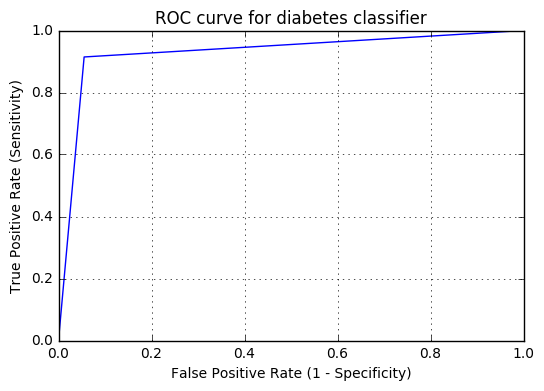

In [33]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [34]:

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.5)


Sensitivity: 0.914634146341
Specificity: 0.944881889764


## AUC 
The percentage of the ROC plot that is underneath the curve:


In [35]:

print(metrics.roc_auc_score(y_test, y_pred_class))


0.929758018053


### calculate cross-validated AUC

In [36]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.97375000000000012